# Classifer dogs and cats usin CNN transfering learning
It is the same problem as Classifier_dogs_and_cats.ipynb, but, using transfering learning to achieve more accuracy.
## Importing libraries and generating dataset

In [8]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_dir = r"./train"
valid_dir = r"./validation"
test_dir = r"./test"

In [10]:
train_datagen = ImageDataGenerator( #Data augmentation for training dataset to avoid overfitting
    rescale = 1 / 255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

valid_datagen = ImageDataGenerator( #Just rescalling validation dataset
    rescale = 1 / 255
)

test_datagen = ImageDataGenerator( #Just rescalling testing dataset
    rescale = 1 / 255
)

In [11]:
train_generator = train_datagen.flow_from_directory( #Loading training dataset
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = "binary"
)

valid_generator = valid_datagen.flow_from_directory( #Loading validation dataset
    valid_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = "binary"
)

test_generator = test_datagen.flow_from_directory( #Loading testing dataset
    test_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Transfer learning sections

In [12]:
from tensorflow.keras.applications import VGG16

### VGG16

In [13]:
conv_base = VGG16(weights = "imagenet", #Using convutional base from VGG16
                 include_top = False,
                 input_shape = (150, 150, 3))

conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model_vgg = Sequential([
    conv_base,
    Flatten(),
    Dense(256, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

model_vgg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


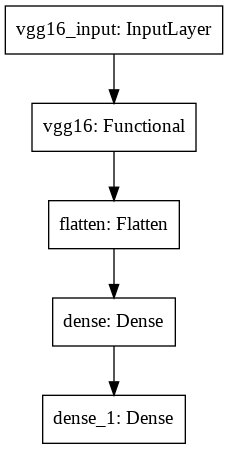

In [15]:
keras.utils.plot_model(model_vgg)

In [16]:
model_vgg.compile(loss = "binary_crossentropy",
                 optimizer = keras.optimizers.Adam(lr = 2e-5),
                  metrics = ["acc"]
                 )
callback_list = [tf.keras.callbacks.EarlyStopping(patience = 25,
                                                restore_best_weights = True),
                 tf.keras.callbacks.ModelCheckpoint("best_vgg.h5", 
                                                 save_best_only = True)
                ]
history_vgg = model_vgg.fit(train_generator, epochs = 1000, validation_data = valid_generator,
             callbacks = callback_list)

Epoch 1/1000
63/63 [==============================] - 64s 410ms/step - loss: 0.5678 - acc: 0.6926 - val_loss: 0.1870 - val_acc: 0.9270
Epoch 2/1000
63/63 [==============================] - 21s 340ms/step - loss: 0.2559 - acc: 0.8962 - val_loss: 0.1499 - val_acc: 0.9400
Epoch 3/1000
63/63 [==============================] - 22s 341ms/step - loss: 0.1991 - acc: 0.9178 - val_loss: 0.1197 - val_acc: 0.9490
Epoch 4/1000
63/63 [==============================] - 22s 342ms/step - loss: 0.1649 - acc: 0.9367 - val_loss: 0.1724 - val_acc: 0.9380
Epoch 5/1000
63/63 [==============================] - 22s 341ms/step - loss: 0.1361 - acc: 0.9515 - val_loss: 0.1481 - val_acc: 0.9560
Epoch 6/1000
63/63 [==============================] - 22s 343ms/step - loss: 0.1412 - acc: 0.9402 - val_loss: 0.0862 - val_acc: 0.9620
Epoch 7/1000
63/63 [==============================] - 22s 345ms/step - loss: 0.1171 - acc: 0.9504 - val_loss: 0.1065 - val_acc: 0.9550
Epoch 8/1000
63/63 [==============================] - 2

<function matplotlib.pyplot.show>

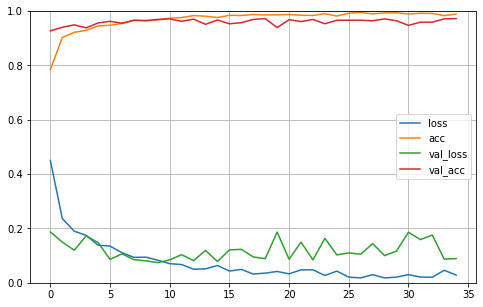

In [17]:
pd.DataFrame(history_vgg.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show

In [19]:
best_vgg = tf.keras.models.load_model("best_vgg.h5")
score_vgg = best_vgg.evaluate(test_generator)

32/32 [==============================] - 3s 98ms/step - loss: 0.0935 - acc: 0.9710


In [ ]:
del model_vgg
del best_vgg
del score_vgg
keras.backend.clear_session()

I used Google colab, because my computer have low power, but, using VGG16, I achieved 97.10% accuracy from test dataset.